# Purpose
Very basic data exploration.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

In [45]:
def missing_values_table(df, print_info=True):
    '''
    Calculate missing values by column for a given dataframe df
    '''
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / df.shape[0]

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    if print_info:
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
               "There are " + str(mis_val_table.shape[0]) + " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table

# Load data

In [19]:
# Instantiate a ZipFile object
# Source: 
# - https://www.geeksforgeeks.org/read-a-zipped-file-as-a-pandas-dataframe/
zmaf = ZipFile('HtM_MAF+Data_Final.zip')
zmsp = ZipFile('HTM_MSP_Final.zip')

# Look at the content inside the zipped files
print(zmaf.infolist())
print()
print(zmsp.infolist())

[<ZipInfo filename='HtM_MAF Data_Final.csv' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=47552276 compress_size=3720796>, <ZipInfo filename='__MACOSX/' filemode='drwxrwxr-x' external_attr=0x4000>, <ZipInfo filename='__MACOSX/._HtM_MAF Data_Final.csv' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=334 compress_size=207>]

[<ZipInfo filename='HTM_MSP_Final.csv' compress_type=deflate filemode='-rwxr-xr-x' external_attr=0x4000 file_size=74857889 compress_size=7104887>, <ZipInfo filename='__MACOSX/' filemode='drwxrwxr-x' external_attr=0x4000>, <ZipInfo filename='__MACOSX/._HTM_MSP_Final.csv' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=212 compress_size=135>]


In [20]:
# Read data as pandas df
maf = pd.read_csv(zmaf.open('HtM_MAF Data_Final.csv'))
msp = pd.read_csv(zmsp.open('HTM_MSP_Final.csv'))

# Check data type

## MAF
This dataset is a log of maintenance actions.

In [21]:
display(maf.head(3))
print()
display(maf.tail(3))

,Job Code,Aircraft,Transaction Code,Malfunction Code,Action Taken Code,Description of Problem,Correction of Problem,Received Date,Completion Date,Corrosion,Bare Metal,Corrosion Prevention Treatment,Routine Maintenance,Unscheduled Maintenance,Mission-Related Maintenance,Failure
0,0NGHY44WC8118573,42,11,0,N,Perform system or component checks,Completed the component or system test,4/26/12,2/27/14,NaN,NaN,NaN,Yes,NaN,NaN,NaN
1,0NGHY45WC8118591,42,11,0,N,Perform system or component checks,Completed the component or system test,4/26/12,2/27/14,NaN,NaN,NaN,Yes,NaN,NaN,NaN
2,0NGHY46WC8118581,42,11,0,N,Perform a periodic inspection,Completed the inspection,4/26/12,2/27/14,NaN,NaN,NaN,Yes,NaN,NaN,NaN


,Job Code,Aircraft,Transaction Code,Malfunction Code,Action Taken Code,Description of Problem,Correction of Problem,Received Date,Completion Date,Corrosion,Bare Metal,Corrosion Prevention Treatment,Routine Maintenance,Unscheduled Maintenance,Mission-Related Maintenance,Failure
362278,P9H8ZU1P9H192405,38,41,NaN,A,"A system, component, part, or surface on the aircraft required attention",Observed the area and attempted to repair it,7/11/17,7/11/17,NaN,NaN,NaN,NaN,Yes,NaN,NaN
362279,P9S13YYP9S221004,3,47,NaN,P,"A system, component, part, or surface on the aircraft required attention",Observed the area and attempted to repair it,8/9/18,8/9/18,NaN,NaN,NaN,NaN,Yes,NaN,NaN
362280,TBC9321P65154601,15,11,787,C,System or component worn or broken,Removed and Replaced the system or component,6/2/12,6/5/12,NaN,NaN,NaN,NaN,Yes,NaN,NaN


In [22]:
# No space in column name

# Classify data types based on my job experience
codes      = ['job_code', 'aircraft_number', 'transaction_code', 'malfunction_code', 'action_taken_code']
narratives = ['problem_description', 'problem_correction']
dates      = ['received_date', 'completion_date']
flags      = ['corrosion_flag', 'bare_metal_flag', 'corrosion_preventive_flag', 'routine_maint_flag', 
              'unscheduled_matin_flag', 'mission_related_flag', 'failure_flag']

# Change maf's column names to snake case
col_names = codes + narratives + dates + flags
assert len(col_names) == maf.shape[1]
maf.columns = col_names

# Show data
display(maf.head(3))
print()
display(maf.tail(3))

,job_code,aircraft_number,transaction_code,malfunction_code,action_taken_code,problem_description,problem_correction,received_date,completion_date,corrosion_flag,bare_metal_flag,corrosion_preventive_flag,routine_maint_flag,unscheduled_matin_flag,mission_related_flag,failure_flag
0,0NGHY44WC8118573,42,11,0,N,Perform system or component checks,Completed the component or system test,4/26/12,2/27/14,NaN,NaN,NaN,Yes,NaN,NaN,NaN
1,0NGHY45WC8118591,42,11,0,N,Perform system or component checks,Completed the component or system test,4/26/12,2/27/14,NaN,NaN,NaN,Yes,NaN,NaN,NaN
2,0NGHY46WC8118581,42,11,0,N,Perform a periodic inspection,Completed the inspection,4/26/12,2/27/14,NaN,NaN,NaN,Yes,NaN,NaN,NaN


,job_code,aircraft_number,transaction_code,malfunction_code,action_taken_code,problem_description,problem_correction,received_date,completion_date,corrosion_flag,bare_metal_flag,corrosion_preventive_flag,routine_maint_flag,unscheduled_matin_flag,mission_related_flag,failure_flag
362278,P9H8ZU1P9H192405,38,41,NaN,A,"A system, component, part, or surface on the aircraft required attention",Observed the area and attempted to repair it,7/11/17,7/11/17,NaN,NaN,NaN,NaN,Yes,NaN,NaN
362279,P9S13YYP9S221004,3,47,NaN,P,"A system, component, part, or surface on the aircraft required attention",Observed the area and attempted to repair it,8/9/18,8/9/18,NaN,NaN,NaN,NaN,Yes,NaN,NaN
362280,TBC9321P65154601,15,11,787,C,System or component worn or broken,Removed and Replaced the system or component,6/2/12,6/5/12,NaN,NaN,NaN,NaN,Yes,NaN,NaN


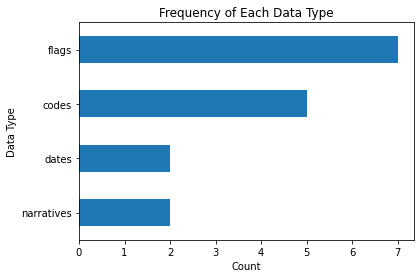

In [23]:
# Plot counts of data types
# Below is the easiest way to plot anything in pandas. The key idea is to provide a "sequence of pairs" in Series.

# Create a dictionary (i.e., sequence of pairs)
plot_dict = {'codes': len(codes), 'narratives': len(narratives), 'dates': len(dates), 'flags': len(flags)}

# Convert plot_dict to a Series
plot_sers = pd.Series(plot_dict)

# Count plot in descending order
fig, axs = plt.subplots(figsize=(6,4))
plot_sers.sort_values(ascending=True).plot.barh(ax=axs)
axs.set(
    xlabel='Count',     
    ylabel='Data Type', 
    title ='Frequency of Each Data Type')
plt.show()

<font color="red"> Comments </font>

This dataset is unique in the sense that it doesn't have interval/ratio variables. As such, there will be lots of data explorations to define problems worth solving, and feature engineering to solve the problems. Nevertheless, based on my experience, there are some initial data cleaning that can be done.

In [24]:
maf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362281 entries, 0 to 362280
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   job_code                   362281 non-null  object
 1   aircraft_number            362281 non-null  int64 
 2   transaction_code           362281 non-null  int64 
 3   malfunction_code           353475 non-null  object
 4   action_taken_code          362271 non-null  object
 5   problem_description        362281 non-null  object
 6   problem_correction         362281 non-null  object
 7   received_date              362281 non-null  object
 8   completion_date            362274 non-null  object
 9   corrosion_flag             18377 non-null   object
 10  bare_metal_flag            14644 non-null   object
 11  corrosion_preventive_flag  9834 non-null    object
 12  routine_maint_flag         193185 non-null  object
 13  unscheduled_matin_flag     111761 non-null  

In [25]:
maf.describe(include=['object'])

,job_code,malfunction_code,action_taken_code,problem_description,problem_correction,received_date,completion_date,corrosion_flag,bare_metal_flag,corrosion_preventive_flag,routine_maint_flag,unscheduled_matin_flag,mission_related_flag,failure_flag
count,362281,353475,362271,362281,362281,362281,362274,18377,14644,9834,193185,111761,16514,8500
unique,362281,226,13,1040,24,2664,2738,1,1,1,1,1,1,1
top,0NGHY44WC8118573,0,0,Perform a periodic inspection,Completed the inspection,5/21/17,2/21/19,Yes,Yes,Yes,Yes,Yes,Yes,Yes
freq,1,202916,193362,144394,151702,552,448,18377,14644,9834,193185,111761,16514,8500


Notice that all the flag variables are of *object* data type. Let's fix this.

**Assume False for missing values.**

In [26]:
# Yes/No to boolean data type
# Source:
# - https://stackoverflow.com/questions/715417/converting-from-a-string-to-boolean-in-python

def str2bool(v):
    return str(v).lower() in ("yes", "true", "t", "1")

for x in flags:
    yes_count_before = maf[x].value_counts()['Yes']
    maf[x] = maf[x].apply(lambda y: str2bool(y)).astype(int)
    yes_count_after = np.sum(maf[x]) 
    assert yes_count_before == yes_count_after

Notice that all datetime columns are of *object* data type. Let's fix this.

In [27]:
# Received Date and Completion Date
# Source 
# - https://stackoverflow.com/questions/22024338/how-do-i-convert-objects-to-datetime-in-a-pandas-dataframe
for x in dates:
    maf[x] = pd.to_datetime(maf[x])
    assert maf[x].dtype == 'datetime64[ns]'

In [28]:
maf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362281 entries, 0 to 362280
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   job_code                   362281 non-null  object        
 1   aircraft_number            362281 non-null  int64         
 2   transaction_code           362281 non-null  int64         
 3   malfunction_code           353475 non-null  object        
 4   action_taken_code          362271 non-null  object        
 5   problem_description        362281 non-null  object        
 6   problem_correction         362281 non-null  object        
 7   received_date              362281 non-null  datetime64[ns]
 8   completion_date            362274 non-null  datetime64[ns]
 9   corrosion_flag             362281 non-null  int64         
 10  bare_metal_flag            362281 non-null  int64         
 11  corrosion_preventive_flag  362281 non-null  int64   

For now, I'll keep `aircraft_number` and `transaction_code` as int. Here are the justifications:
* If convert them to string, very clumsy during masking since I'll need to use quotations
* More importantly, they matches with the default output in DECKPLATE, making code adaptation easier.

In [29]:
maf.head(3)

,job_code,aircraft_number,transaction_code,malfunction_code,action_taken_code,problem_description,problem_correction,received_date,completion_date,corrosion_flag,bare_metal_flag,corrosion_preventive_flag,routine_maint_flag,unscheduled_matin_flag,mission_related_flag,failure_flag
0,0NGHY44WC8118573,42,11,0,N,Perform system or component checks,Completed the component or system test,2012-04-26,2014-02-27,0,0,0,1,0,0,0
1,0NGHY45WC8118591,42,11,0,N,Perform system or component checks,Completed the component or system test,2012-04-26,2014-02-27,0,0,0,1,0,0,0
2,0NGHY46WC8118581,42,11,0,N,Perform a periodic inspection,Completed the inspection,2012-04-26,2014-02-27,0,0,0,1,0,0,0


Next, check for duplicated records. It appears that `job_code` is the identifier. Thus, some records might be exactly the same but are only different by the `job_code`.

In [30]:
# Prove that job_code is the identifier of the MAF dataset
assert maf['job_code'].nunique() == len(maf)

In [31]:
# Set job_code as index
maf = maf.set_index('job_code')
maf.head()

,aircraft_number,transaction_code,malfunction_code,action_taken_code,problem_description,problem_correction,received_date,completion_date,corrosion_flag,bare_metal_flag,corrosion_preventive_flag,routine_maint_flag,unscheduled_matin_flag,mission_related_flag,failure_flag
job_code,,,,,,,,,,,,,,,
0NGHY44WC8118573,42,11,0,N,Perform system or component checks,Completed the component or system test,2012-04-26,2014-02-27,0,0,0,1,0,0,0
0NGHY45WC8118591,42,11,0,N,Perform system or component checks,Completed the component or system test,2012-04-26,2014-02-27,0,0,0,1,0,0,0
0NGHY46WC8118581,42,11,0,N,Perform a periodic inspection,Completed the inspection,2012-04-26,2014-02-27,0,0,0,1,0,0,0
0NGHY47WC8118577,42,11,0,N,Perform a periodic inspection,Completed the inspection,2012-04-26,2014-02-27,0,0,0,1,0,0,0
0NGHY48WC8118586,42,11,0,N,Perform a periodic inspection,Completed the inspection,2012-04-26,2014-02-27,0,0,0,1,0,0,0


In [32]:
# Remove duplicates
print('Shape before:', maf.shape)
maf = maf.drop_duplicates(keep='first') # keep one copy
print('Shape after:', maf.shape)

Shape before: (362281, 15)
Shape after: (199541, 15)


Finally, let's order our MAF dataset for easier inspection. The idea is to show a sequence of maintenance events happening to each aircraft.

In [38]:
maf = maf.sort_values(by=['aircraft_number', 'received_date', 'completion_date'])

In [46]:
maf.head(5)

,aircraft_number,transaction_code,malfunction_code,action_taken_code,problem_description,problem_correction,received_date,completion_date,corrosion_flag,bare_metal_flag,corrosion_preventive_flag,routine_maint_flag,unscheduled_matin_flag,mission_related_flag,failure_flag
job_code,,,,,,,,,,,,,,,
3MN1EWTP6G267221,1,11,0,0,Perform an aircraft transfer or acceptance inspection,Completed the inspection,2013-09-24,2013-09-25,0,0,0,1,0,0,0
3MN1EWQP6G267221,1,11,0,0,Perform an aircraft transfer or acceptance inspection,Completed the inspection,2013-09-24,2013-10-02,0,0,0,1,0,0,0
3MN1EWSP6G267221,1,11,0,0,Perform an aircraft transfer or acceptance inspection,Completed the inspection,2013-09-24,2013-10-03,0,0,0,1,0,0,0
3MN1EX4P6G267226,1,11,105,C,"A system, component, part, or surface on the aircraft required attention",Removed and replaced system or component,2013-09-24,2013-10-03,0,0,0,0,1,0,0
3MN1EWRP6G267221,1,11,0,0,Perform an aircraft transfer or acceptance inspection,Completed the inspection,2013-09-24,2013-10-04,0,0,0,1,0,0,0


In [48]:
missing_values_table(maf)

Your selected dataframe has 15 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
malfunction_code,5846,2.9
action_taken_code,8,0.0
completion_date,7,0.0


In my opinion, there are still some "duplicates" left because they don't provide meaningful information. For example, the first three observations in the output above are really the same. Of course, it could be the case that the maintaners performed three separate inspections, but since no problem was found, no new information can be extracted. It's like keep checking until an event happens. 

Instead, it's much more meaningful to compress the first three records into just one observation. For example, from 2013-09-24 - 2013-10-03, maintainer "\[p\]erform\[ed\] an aircraft transfer or acceptance inspection" and he/she "\[c\]ompleted the inspection". If a skeptic is still feared that information is lost, we could add a variable that counts how many time this maintenance action was repeated. (Wait, with this approach, my result would look similar to DARTe's dataset I've been working with.) 

The benefit of this approach is two-fold:
1. Data are compressed without losing any information.
2. We can reduce lots of errors when joining with MSP dataset later. The MSP dataset is in GMT timezone while the the MAF dataset is in local timezone yet it doesn't specify what it is. For examle, right now it's 02:XX:XX am, Friday, 18 February, 2022 GMT*. But in Los Angeles, it's 06:XX:XX, Thursday, 17, February, 2022. So, we can see that joining on date and claiming that an error code X happened on a particular date D was given maintenance action M is not correct. On the other hand, since the date difference between any two time zone can't be more than 1 day, it'll be more accurate to say that during this period we have some amount of error code X. <font color='red'> This is a really good example of why forecasting gives more accurate results over a large period </font>

Finally, I think the key to do this is to use `transaction_code = 11`, `malfunction_code = 0`, `action_taken_code= 0`. A challenge is that there are some missing values in `malfunction_code` and `action_taken_code` so we'll need to deal with them first.

Resource:
* https://time.is/London

In [50]:
# Save data
maf.to_csv('maf_basic_cleaning.csv')

## MSP
This dataset documents all the error codes captured by the aircraft's avionics system.

In [12]:
display(msp.head(3))
print()
display(msp.tail(3))

,AIRCRAFT,SQUADRON,LOT,MSP,ZULU_TIME,FLIGHT_MODE
0,1,HH,100,ZJMZTL,01-APR-2014 00:25:39:00,EngineTurn
1,1,HH,100,JDJDMQ,01-APR-2014 00:25:39:00,EngineTurn
2,1,HH,100,RTVBHP,01-APR-2014 00:25:39:00,EngineTurn


,AIRCRAFT,SQUADRON,LOT,MSP,ZULU_TIME,FLIGHT_MODE
1390134,45,LL,110,MZUXNV,01-MAR-2019 01:27:13:35,EngineTurn
1390135,45,LL,110,MZUXBM,01-MAR-2019 01:27:13:35,EngineTurn
1390136,45,LL,110,MQMQHP,01-MAR-2019 01:27:13:35,EngineTurn


In [13]:
msp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390137 entries, 0 to 1390136
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   AIRCRAFT     1390137 non-null  int64 
 1   SQUADRON     1390137 non-null  object
 2   LOT          1390137 non-null  int64 
 3   MSP          1390137 non-null  object
 4   ZULU_TIME    1390137 non-null  object
 5   FLIGHT_MODE  1390137 non-null  object
dtypes: int64(2), object(4)
memory usage: 63.6+ MB


The MSP dataset just has a few features. There's no need to change feature names as they are well-standardized. (We'll keep them as upper-case to avoid confusion with MAF dataset).

It's clear that `ZULU_TIME` feature should be of datetime data type.

In [14]:
# Source
# - https://stackoverflow.com/questions/32204631/how-to-convert-string-to-datetime-format-in-pandas-python 
msp['ZULU_TIME'] = pd.to_datetime(msp['ZULU_TIME'].apply(lambda x: x[:-3]))

In [15]:
msp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390137 entries, 0 to 1390136
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   AIRCRAFT     1390137 non-null  int64         
 1   SQUADRON     1390137 non-null  object        
 2   LOT          1390137 non-null  int64         
 3   MSP          1390137 non-null  object        
 4   ZULU_TIME    1390137 non-null  datetime64[ns]
 5   FLIGHT_MODE  1390137 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 63.6+ MB


In [16]:
display(msp.head())

,AIRCRAFT,SQUADRON,LOT,MSP,ZULU_TIME,FLIGHT_MODE
0,1,HH,100,ZJMZTL,2014-04-01 00:25:39,EngineTurn
1,1,HH,100,JDJDMQ,2014-04-01 00:25:39,EngineTurn
2,1,HH,100,RTVBHP,2014-04-01 00:25:39,EngineTurn
3,1,HH,100,RTUXHP,2014-04-01 00:25:39,EngineTurn
4,1,HH,100,RTUXMZ,2014-04-01 00:25:39,EngineTurn


In [17]:
msp.describe(include=['object'])

,SQUADRON,MSP,FLIGHT_MODE
count,1390137,1390137,1390137
unique,41,1122,3
top,VV,RTVBHP,EngineTurn
freq,142123,126188,1107689


In [27]:
# A lot can have multiple aircrafts but one aircraft can only belong to one lot
msp.groupby(by='AIRCRAFT')['LOT'].nunique()

AIRCRAFT
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
Name: LOT, dtype: int64

In [28]:
# Same thing for squadron?
# Nope
msp.groupby(by='AIRCRAFT')['SQUADRON'].nunique()

AIRCRAFT
1     3
2     5
3     4
4     1
5     3
6     1
7     2
8     2
9     2
10    5
11    1
12    1
13    4
14    7
15    3
16    2
17    1
18    1
19    1
20    1
21    2
22    2
23    2
24    3
25    2
26    1
27    4
28    2
29    3
30    4
31    5
32    3
33    3
34    3
35    3
36    3
37    1
38    3
39    3
40    3
41    4
42    2
43    6
44    2
45    2
Name: SQUADRON, dtype: int64